In [2]:
#importing Libraries 
import pandas as pd 
import numpy as np   
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  
import seaborn as sns  


In [3]:
#load the dataset
df=pd.read_csv(r'C:\Users\ridaa\Earthquake_Prediction\Notebook_Experiments\Data\data.csv')

In [4]:
#drop id column(unwanted categorical columns) if present
if "id" in df.columns:
    df.drop(["id"],axis=1, inplace=True)
df


,latitude,longitude,depth,mag,hour,date,earthquake
0,34.189835,-117.58800,6.000,1.70,0,1973-01-01,0
1,-9.214000,150.63400,41.000,5.30,3,1973-01-01,1
2,48.308666,-122.11733,13.680,2.20,4,1973-01-01,0
3,-15.012000,-173.95800,33.000,5.00,5,1973-01-01,1
4,19.443666,-155.36084,7.302,1.85,7,1973-01-01,0
...,...,...,...,...,...,...,...
3855714,33.371334,-116.87400,5.270,2.14,23,2021-12-31,0
3855715,60.040165,-153.11884,0.330,-0.57,23,2021-12-31,0
3855716,54.631600,-163.37620,19.980,3.40,23,2021-12-31,0
3855717,51.477600,-177.77790,39.200,2.10,23,2021-12-31,0


In [5]:
#check for null values
print(df.shape)
print(df.columns)
print(df.isnull())
df.isnull().sum()


(3855719, 7)
Index(['latitude', 'longitude', 'depth', 'mag', 'hour', 'date', 'earthquake'], dtype='object')
         latitude  longitude  depth    mag   hour   date  earthquake
0           False      False  False  False  False  False       False
1           False      False  False  False  False  False       False
2           False      False  False  False  False  False       False
3           False      False  False  False  False  False       False
4           False      False  False  False  False  False       False
...           ...        ...    ...    ...    ...    ...         ...
3855714     False      False  False  False  False  False       False
3855715     False      False  False  False  False  False       False
3855716     False      False  False  False  False  False       False
3855717     False      False  False  False  False  False       False
3855718     False      False  False  False  False  False       False

[3855719 rows x 7 columns]


latitude      0
longitude     0
depth         0
mag           0
hour          0
date          0
earthquake    0
dtype: int64

In [6]:
#define magnitude threshold
MAG_THRESHOLD = 4.0
df['earthquake']=(df['mag']>=MAG_THRESHOLD).astype(int)
df

,latitude,longitude,depth,mag,hour,date,earthquake
0,34.189835,-117.58800,6.000,1.70,0,1973-01-01,0
1,-9.214000,150.63400,41.000,5.30,3,1973-01-01,1
2,48.308666,-122.11733,13.680,2.20,4,1973-01-01,0
3,-15.012000,-173.95800,33.000,5.00,5,1973-01-01,1
4,19.443666,-155.36084,7.302,1.85,7,1973-01-01,0
...,...,...,...,...,...,...,...
3855714,33.371334,-116.87400,5.270,2.14,23,2021-12-31,0
3855715,60.040165,-153.11884,0.330,-0.57,23,2021-12-31,0
3855716,54.631600,-163.37620,19.980,3.40,23,2021-12-31,0
3855717,51.477600,-177.77790,39.200,2.10,23,2021-12-31,0


In [7]:
#check earthquake class distribuition
print(df['earthquake'].value_counts())
print(f"percentage of significant earthquakes:{df['earthquake'].mean()*100:.2f}%")

earthquake
0    3402473
1     453246
Name: count, dtype: int64
percentage of significant earthquakes:11.76%


In [8]:
#Balencind the data
from sklearn.utils import resample
majority=df[df.earthquake==0]
minority=df[df.earthquake==1]
#upsample minority class
minority_upsample = resample(minority,replace=True,
                             n_samples=len(majority),
                             random_state=123)
df=df_balanced=pd.concat([majority,minority_upsample])
print(f"percentage of earthquake in the dataset: {df.earthquake.mean()*100:.2f}")



percentage of earthquake in the dataset: 50.00


In [9]:
df.isnull().sum()

latitude      0
longitude     0
depth         0
mag           0
hour          0
date          0
earthquake    0
dtype: int64

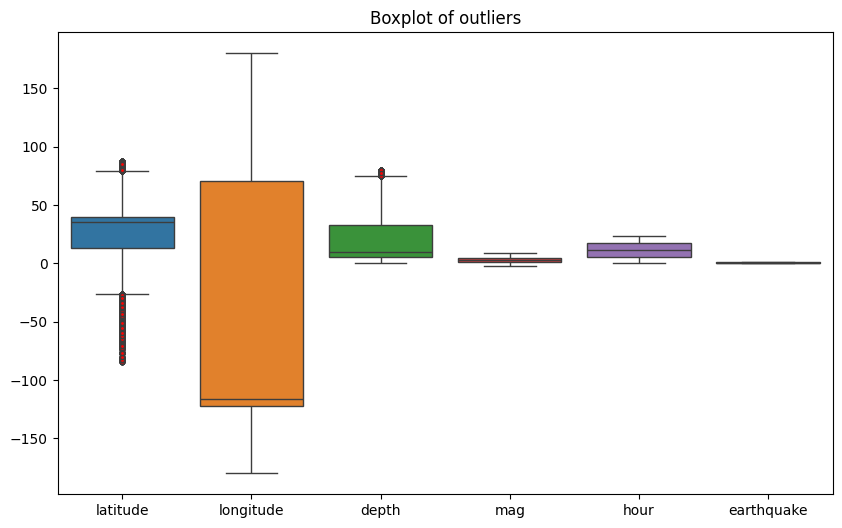

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, flierprops=dict(markerfacecolor='red', markersize=3))
plt.title("Boxplot of outliers")
plt.show()

In [11]:
#removing outliers using IQR
def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[column]>lower_bound)&(df[column]<upper_bound)]
    return df
df=remove_outliers(df,'depth')
df=remove_outliers(df,'mag')
df=df.reset_index(drop=True)

In [12]:
categorical_cols=[col for col in df.columns if df[col].dtype=='object']
print(f"categorical columns:{categorical_cols}")

numerical_cols=[col for col in df.columns if df[col].dtype!='object']
print(f"Numerical colums:{numerical_cols}")

categorical columns:['date']
Numerical colums:['latitude', 'longitude', 'depth', 'mag', 'hour', 'earthquake']


In [13]:
X=df[['latitude','longitude','depth','mag','hour']]
Y=df['earthquake']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42, stratify=Y)
#print(X_train)
#print(Y_train)

In [15]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#XGBoost Algorithm
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
xgb=XGBClassifier()
xgb.fit(X_train_scaled, Y_train)
y_pred=xgb.predict(X_test_scaled)
print("XGBClassifier metrics:")
print("Accuracy:",accuracy_score(Y_test,y_pred))
print("Precision:",accuracy_score(Y_test,y_pred))
print("Recall:",accuracy_score(Y_test,y_pred))
print("F1 score:",accuracy_score(Y_test,y_pred))

XGBClassifier metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [17]:
#XGBoost classification Report
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    651878
           1       1.00      1.00      1.00    515795

    accuracy                           1.00   1167673
   macro avg       1.00      1.00      1.00   1167673
weighted avg       1.00      1.00      1.00   1167673



In [21]:
import joblib

# Replace 'xgb' with your actual model variable if different
joblib.dump(xgb, r'C:\Users\ridaa\Earthquake_Prediction\Artifacts\Model.pkl')

['C:\\Users\\ridaa\\Earthquake_Prediction\\Artifacts\\Model.pkl']